Nama: Muhammad Ashlah Afifi

NIM: 1103210216

Kelas: TK

In [12]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
# 2. Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
# 3. Build the CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
# 4. Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# 5. Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 73s 45ms/step - loss: 1.5355 - accuracy: 0.4404 - val_loss: 1.2714 - val_accuracy: 0.5430
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1592 - accuracy: 0.5883 - val_loss: 1.0976 - val_accuracy: 0.6124
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0226 - accuracy: 0.6403 - val_loss: 1.0067 - val_accuracy: 0.6451
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9230 - accuracy: 0.6783 - val_loss: 0.9394 - val_accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8504 - accuracy: 0.7043 - val_loss: 1.0020 - val_accuracy: 0.6549
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7896 - accuracy: 0.7238 - val_loss: 0.8935 - val_accuracy: 0.6914
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7402 - accuracy: 0.7425 - val_loss: 0.8963 -

313/313 - 3s - loss: 0.9312 - accuracy: 0.7020 - 3s/epoch - 11ms/step
0.7020000219345093


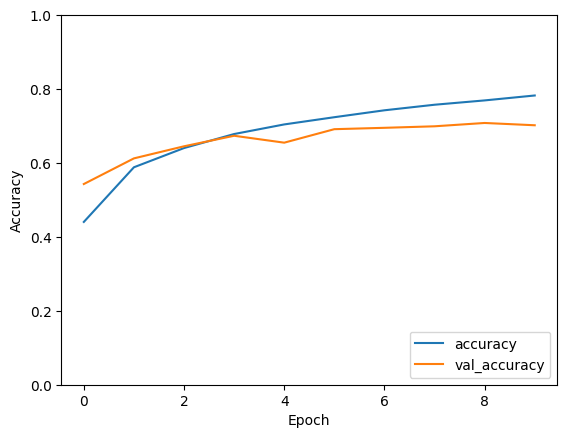

In [17]:
# 6. Evaluate the Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)
